In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Import csv datas 
data_Castelmassa = pd.read_csv('data/Castelmassa.csv',sep=';',low_memory=False)
data_Boretto = pd.read_csv('data/Boretto.csv',sep=';',low_memory=False)
data_Polesella = pd.read_csv('data/Polesella.csv',sep=';',low_memory=False)
data_SAntonio = pd.read_csv('data/SAntonio.csv',sep=';',low_memory=False)
data_Spessa = pd.read_csv('data/Spessa.csv',sep=';',low_memory=False)
data_SSebastiano = pd.read_csv('data/SSebastiano.csv',sep=';',low_memory=False)


#Remove undesired columns
data_Castelmassa.drop('Selettiva', axis=1, inplace=True)
data_Boretto.drop('Selettiva', axis=1, inplace=True)
data_Polesella.drop('Selettiva', axis=1, inplace=True)
data_SAntonio.drop('Selettiva', axis=1, inplace=True)
data_Spessa.drop('Selettiva', axis=1, inplace=True)
data_SSebastiano.drop('Selettiva', axis=1, inplace=True)

#Change weird column names
data_Castelmassa.rename(columns={'Castelmassa SIAP - Livello Idrometrico - 15968 (m)': 'Level'}, inplace=True)
data_Boretto.rename(columns={'Boretto - Livello Idrometrico - 14017 (m)': 'Level'}, inplace=True)
data_Polesella.rename(columns={'Polesella SIAP - Livello Idrometrico - 15980 (m)': 'Level'}, inplace=True)
data_SAntonio.rename(columns={'Isola S.Antonio PO - Livello Idrometrico - 11331 (m)': 'Level'}, inplace=True)
data_Spessa.rename(columns={'Spessa Po - Livello Idrometrico - 13943 (m)': 'Level'}, inplace=True)
data_SSebastiano.rename(columns={'San Sebastiano Po - Livello Idrometrico - 35580 (m)': 'Level'}, inplace=True)

#print(data_Castelmassa)
#print(data_Boretto)
#print(data_Polesella)
#print(data_SAntonio)
#print(data_Spessa)
#print(data_SSebastiano)

#Remove lines containing NAN
data_Castelmassa.dropna(inplace=True)
data_Boretto.dropna(inplace=True)
data_Polesella.dropna(inplace=True)
data_SAntonio.dropna(inplace=True)
data_Spessa.dropna(inplace=True)
data_SSebastiano.dropna(inplace=True)

data_Castelmassa = data_Castelmassa.reset_index(drop=True)
data_Boretto = data_Boretto.reset_index(drop=True)
data_Polesella = data_Polesella.reset_index(drop=True)
data_SAntonio = data_SAntonio.reset_index(drop=True)
data_Spessa = data_Spessa.reset_index(drop=True)
data_SSebastiano = data_SSebastiano.reset_index(drop=True)

In [2]:
def RemoveOutlier(data):
    #In case it gives error because of non numerical data
    data['Level'] = pd.to_numeric(data['Level'], errors='coerce')
    #Remove outliers
    mean=np.mean(data['Level'])
    sigma = np.std(data['Level'])

    #Remove rows with z-score greater than 3
    data = data[ data['Level']< mean+3*sigma]
    #Now for smaller extremes
    data = data[ data['Level']> mean-3*sigma]

    #Obtain the delta Level-Mean
    data['Delta'] = data['Level']-mean

    #Rename the time
    data['Orario'] = pd.to_datetime(data['Orario'])
    # Add a new column with the year extracted from the 'date' column
    data['Year'] = data['Orario'].dt.year
    return data

In [3]:
data_Castelmassa = RemoveOutlier(data_Castelmassa)
data_Boretto = RemoveOutlier(data_Boretto)
data_Polesella = RemoveOutlier(data_Polesella)
data_SAntonio = RemoveOutlier(data_SAntonio)
data_Spessa = RemoveOutlier(data_Spessa)
data_SSebastiano = RemoveOutlier(data_SSebastiano)

In [4]:
data_Castelmassa['month'] = [i.month for i in data_Castelmassa['Orario']]
data_Boretto['month'] = [i.month for i in data_Boretto['Orario']]
data_Polesella['month'] = [i.month for i in data_Polesella['Orario']]
data_SAntonio['month'] = [i.month for i in data_SAntonio['Orario']]
data_Spessa['month'] = [i.month for i in data_Spessa['Orario']]
data_SSebastiano['month'] = [i.month for i in data_SSebastiano['Orario']]

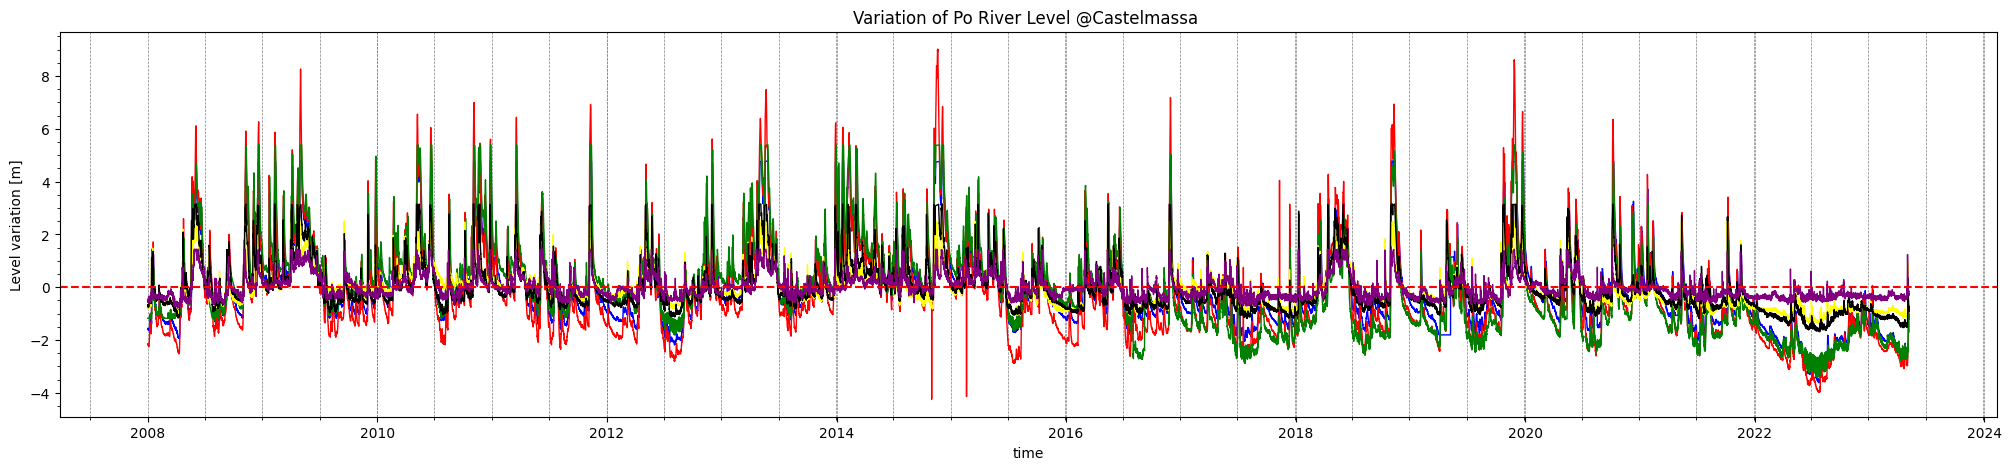

In [5]:
#Plot result
De_Castelmassa = data_Castelmassa['Delta']
De_Boretto = data_Boretto['Delta']
De_Polesella = data_Polesella['Delta']
De_SAntonio = data_SAntonio['Delta']
De_Spessa = data_Spessa['Delta']
De_SSebastiano = data_SSebastiano['Delta']

De_Castelmassa = De_Castelmassa.reset_index(drop=True)
De_Boretto = De_Boretto.reset_index(drop=True)
De_Polesella = De_Polesella.reset_index(drop=True)
De_SAntonio = De_SAntonio.reset_index(drop=True)
De_Spessa = De_Spessa.reset_index(drop=True)
De_SSebastiano = De_SSebastiano.reset_index(drop=True)


plt.subplots(figsize=(25, 5))
plt.plot(data_Castelmassa['Orario'],De_Castelmassa,color='blue', linewidth=1)
plt.plot(data_Boretto['Orario'],De_Boretto,color='red', linewidth=1)
plt.plot(data_Polesella['Orario'],De_Polesella,color='green', linewidth=1)
plt.plot(data_SAntonio['Orario'],De_SAntonio,color='yellow', linewidth=1)
plt.plot(data_Spessa['Orario'],De_Spessa,color='black', linewidth=1)
plt.plot(data_SSebastiano['Orario'],De_SSebastiano,color='purple', linewidth=1)
plt.title('Variation of Po River Level @Castelmassa ')
plt.xlabel('time')
plt.ylabel('Level variation [m]')

plt.axhline(y=0, color='red', linestyle='--')
plt.grid(axis='x', which='both',color='gray', linestyle='--', linewidth=0.5)

plt.minorticks_on()
plt.grid(axis='x',which='minor', linestyle='--', linewidth=0.5)

In [6]:
def ConstructDF(data):
    df = data
    df['date'] = pd.to_datetime(df['Orario'])
    monthly_avg = df.groupby([df['date'].dt.year, df['date'].dt.month])['Delta'].mean()
    yearly_avg = monthly_avg.groupby(level=0).mean()
    
    # Convert monthly_avg Series to a DataFrame
    df = monthly_avg.rename_axis(['Year', 'Month']).reset_index(name='Average')
    df['Year'] = df['Year'].astype(str)  # Convert 'Year' column to string
    df['Month'] = df['Month'].astype(str)  # Convert 'Month' column to string
    df['Date'] = pd.to_datetime(df['Year'] + '-' + df['Month'], format='%Y-%m')
    return df

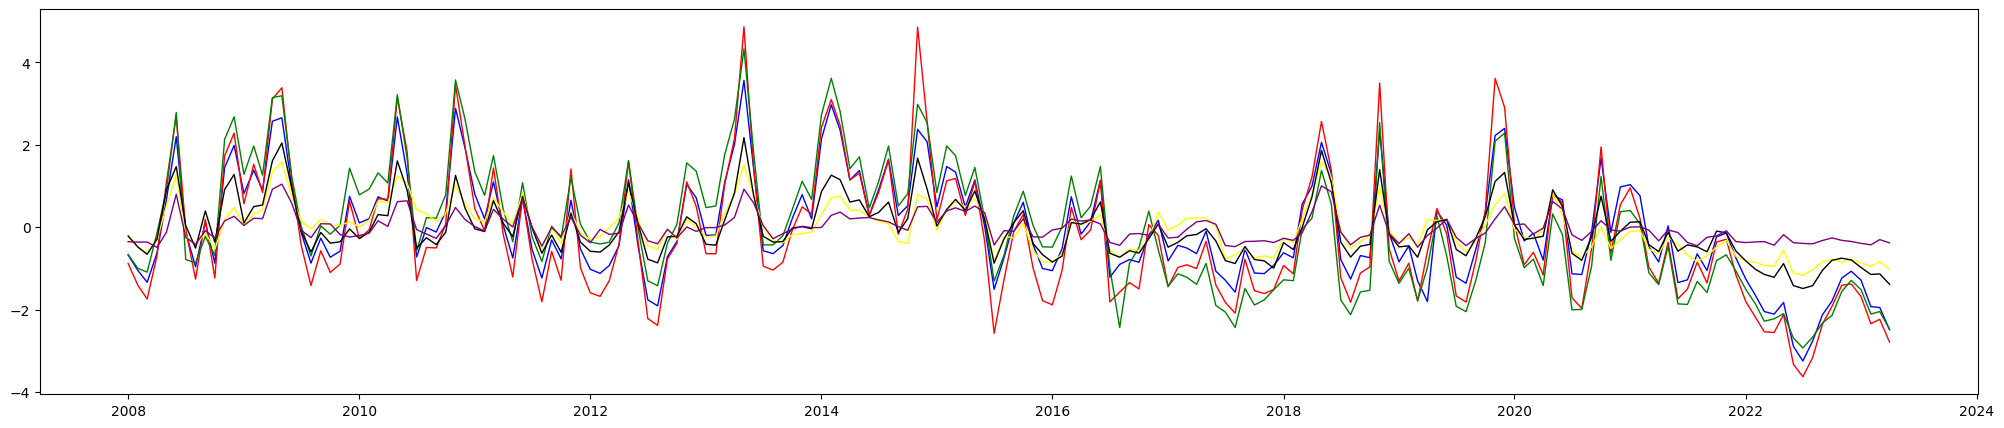

In [7]:
df_Castelmassa = ConstructDF(data_Castelmassa)
df_Boretto = ConstructDF(data_Boretto)
df_Polesella = ConstructDF(data_Polesella)
df_SAntonio = ConstructDF(data_SAntonio)
df_Spessa = ConstructDF(data_Spessa)
df_SSebastiano = ConstructDF(data_SSebastiano)

# Castelmassa ha l'ultima misurazione ad aprile contro gli altri a maggio
df_Boretto = df_Boretto[0:184]
df_Polesella = df_Polesella[0:184]
df_SAntonio = df_SAntonio[0:184]
df_Spessa = df_Spessa[0:184]
df_SSebastiano = df_SSebastiano[0:184]

plt.subplots(figsize=(25, 5))
plt.plot(df_Castelmassa['Date'],df_Castelmassa['Average'],color='blue', linewidth=1)
plt.plot(df_Boretto['Date'],df_Boretto['Average'],color='red', linewidth=1)
plt.plot(df_Polesella['Date'],df_Polesella['Average'],color='green', linewidth=1)
plt.plot(df_SAntonio['Date'],df_SAntonio['Average'],color='yellow', linewidth=1)
plt.plot(df_Spessa['Date'],df_Spessa['Average'],color='black', linewidth=1)
plt.plot(df_SSebastiano['Date'],df_SSebastiano['Average'],color='purple', linewidth=1)

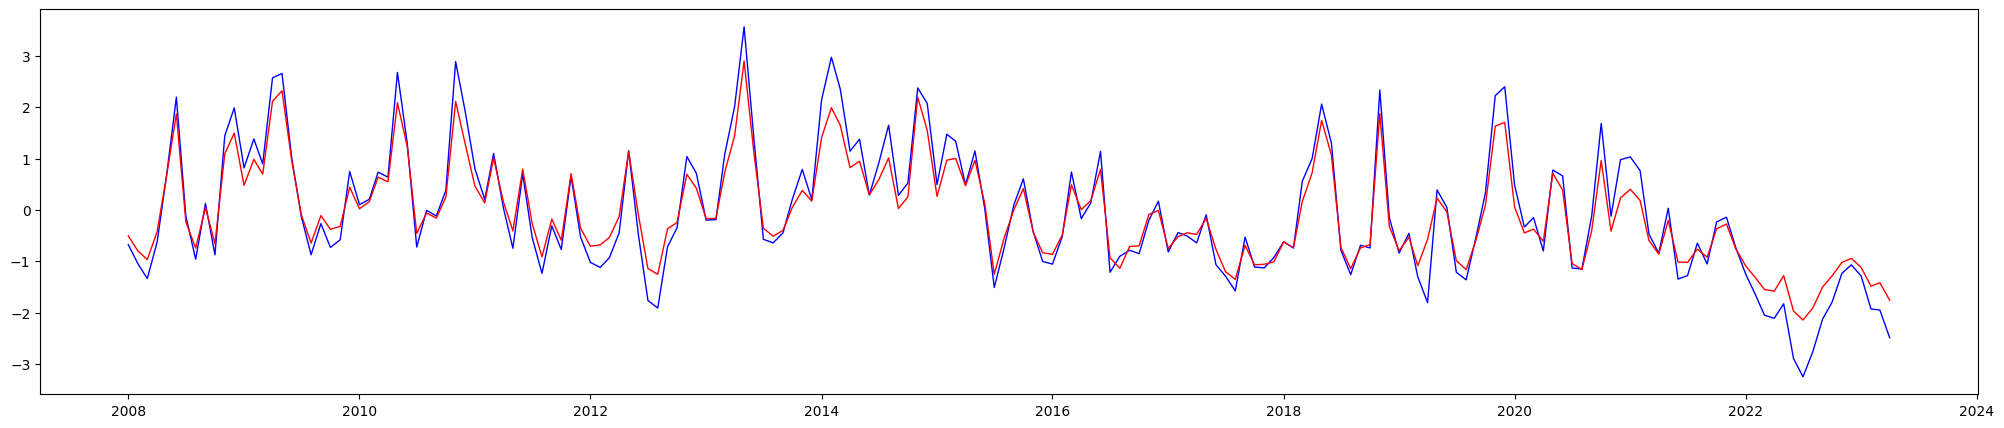

In [8]:
df_Po = df_Castelmassa.copy()
df_Po.Average = np.mean([df_Castelmassa['Average'], df_Boretto['Average'], df_Polesella['Average'], df_SAntonio['Average'], df_Spessa['Average'], df_SSebastiano['Average']], axis=0)

plt.subplots(figsize=(25, 5))
plt.plot(df_Castelmassa['Date'],df_Castelmassa['Average'],color='blue', linewidth=1)
plt.plot(df_Po['Date'],df_Po['Average'],color='red', linewidth=1)

In [9]:
import datetime
df_Po.index = pd.to_datetime(df_Po['Date'], format='%Y-%m-%d')
import seaborn as sns
sns.set()

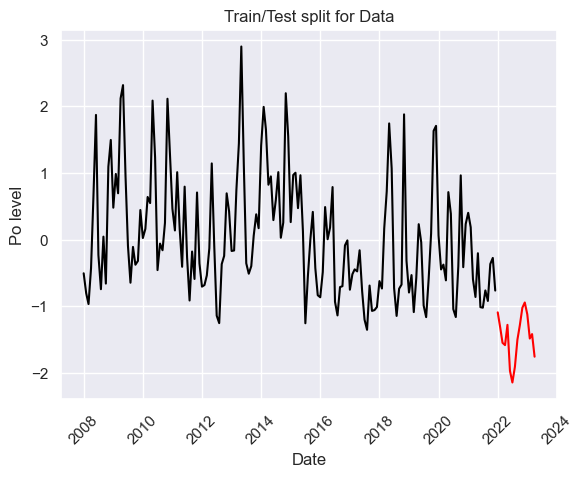

In [10]:
train = df_Po[df_Po.index < pd.to_datetime('2022-01-01', format='%Y-%m-%d')]
test = df_Po[df_Po.index >= pd.to_datetime('2022-01-01', format='%Y-%m-%d')]

plt.plot(train.Average, color = "black")
plt.plot(test.Average, color = "red")
plt.ylabel('Po level')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train/Test split for Data")
plt.show()

In [16]:
#!pip install pmdarima
#import pmdarima as pm
#stepwise_model = pm.auto_arima(train.Average,start_p=1, d=1, start_q=1,
#                            max_p=12, max_q=12,
#                            m=12,
#                            seasonal=True, stationary=False,
#                            information_criterion='aic',
#                            stepwise=False,
#                            suppress_warnings=True)
#stepwise_model.fit(train.Average)

# It is quite slow to run, it is normal, do not worry
# It is automatized to speed up in case of modification so that anyone can update it

In [17]:
# Check that these numbers are the same than the one we get from the
# process above
p=1
d=1
q=1

P=2
D=0
Q=1
M=12

C:\Users\ghesi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ghesi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


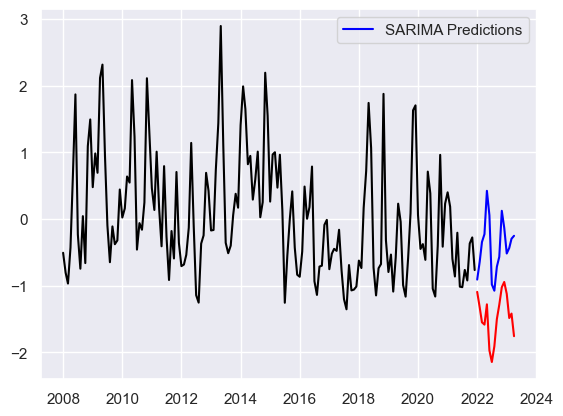

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
SARIMAXmodel = SARIMAX(train.Average, order = (p, d, q), seasonal_order=(P,D,Q,M))
SARIMAXmodel = SARIMAXmodel.fit()

new_date = pd.read_excel('Dati_po/Date.xlsx')
new_date = new_date.Date

y_pred = SARIMAXmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train.Average, color = "black")
plt.plot(test.Average, color = "red")
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

C:\Users\ghesi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ghesi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


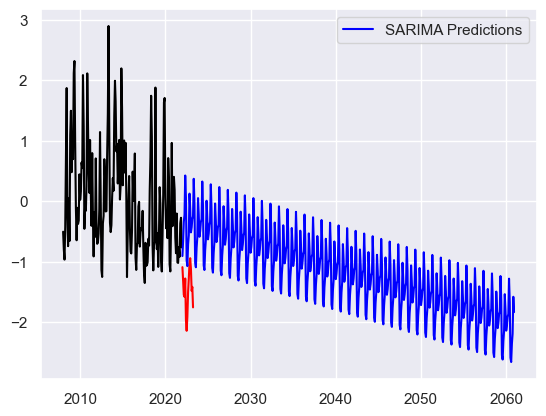

In [19]:
SARIMAXmodel = SARIMAX(train.Average, order = (p, d, q), seasonal_order=(P,D,Q,M))
SARIMAXmodel = SARIMAXmodel.fit()

new_date = pd.read_excel('Dati_po/Date.xlsx')
new_date = new_date.Date

y_pred = SARIMAXmodel.get_forecast(len(test.index)+452)
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = SARIMAXmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = np.concatenate((test.index, pd.to_datetime(new_date, format='%Y-%m-%d')), axis=None) 
y_pred_out = y_pred_df["Predictions"] 

plt.plot(train.Average, color = "black")
plt.plot(test.Average, color = "red")
plt.plot(y_pred_out, color='Blue', label = 'SARIMA Predictions')
plt.legend()

In [20]:
#print(train)
d = {'Year': y_pred_df.index.year, 'Month': y_pred_df.index.month, 'Average': y_pred_df.Predictions, 'Date': y_pred_df.index}
y = pd.DataFrame(data=d)
y = y.reset_index(drop=True)

yy = train.copy()
yy = yy.reset_index(drop=True)

df = pd.concat([yy,y])
df = df.reset_index(drop=True)
print(df)

     Year Month   Average       Date
0    2008     1 -0.506280 2008-01-01
1    2008     2 -0.805029 2008-02-01
2    2008     3 -0.967481 2008-03-01
3    2008     4 -0.429296 2008-04-01
4    2008     5  0.658539 2008-05-01
..    ...   ...       ...        ...
631  2060     8 -2.660958 2060-08-01
632  2060     9 -2.356519 2060-09-01
633  2060    10 -2.193894 2060-10-01
634  2060    11 -1.582481 2060-11-01
635  2060    12 -1.835153 2060-12-01

[636 rows x 4 columns]


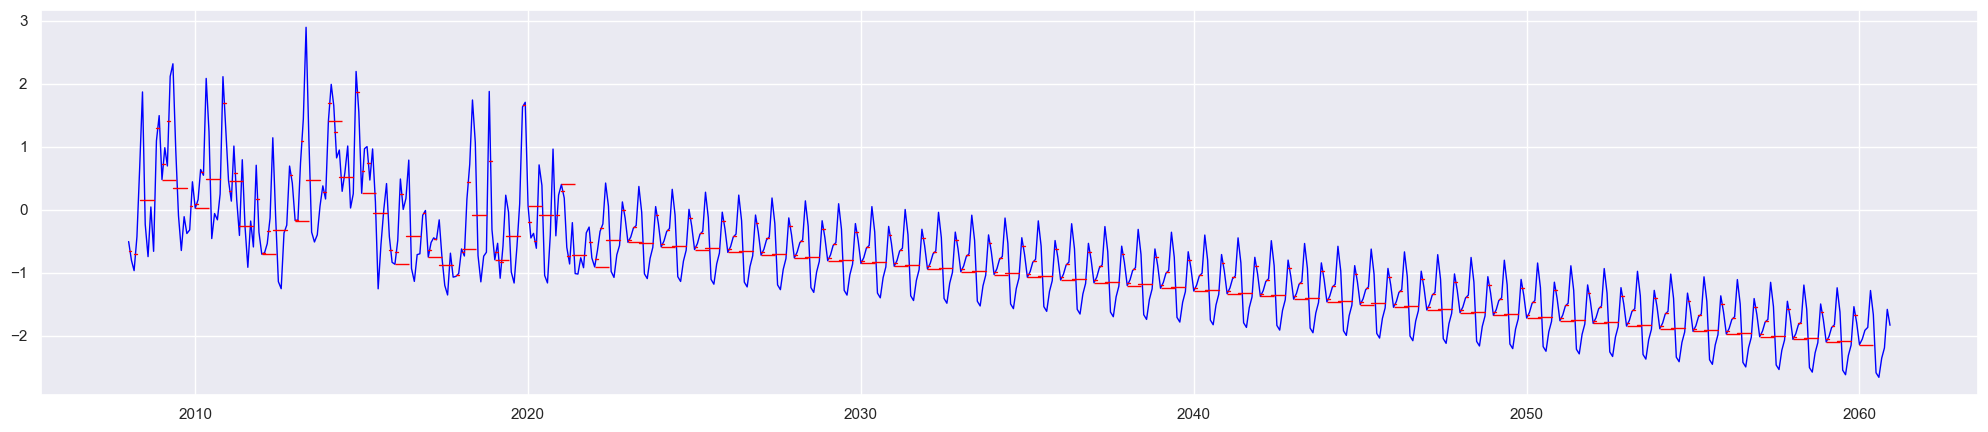

In [21]:
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'],df['Average'],color='blue', linewidth=1)
#plt.plot(df['Date'],np.ones(np.size(df['Average']))*np.mean(df['Average']),color='blue', linewidth=1)
for i in range(12,np.size(df['Date']),12):
    plt.plot(df['Date'][i-12:i-10],np.ones(np.size(df['Average'][i-12:i-10]))*np.mean(df['Average'][i-12:i-10]),color='red', linewidth=1)
    plt.plot(df['Date'][i-10:i-8],np.ones(np.size(df['Average'][i-10:i-8]))*np.mean(df['Average'][i-10:i-8]),color='red', linewidth=1)
    plt.plot(df['Date'][i-8:i-2],np.ones(np.size(df['Average'][i-8:i-2]))*np.mean(df['Average'][i-8:i-2]),color='red', linewidth=1)
    plt.plot(df['Date'][i-2:i],np.ones(np.size(df['Average'][i-2:i]))*np.mean(df['Average'][i-2:i]),color='red', linewidth=1)
    plt.plot(df['Date'][i],df['Average'][i],color='red', marker=1, markersize=10)


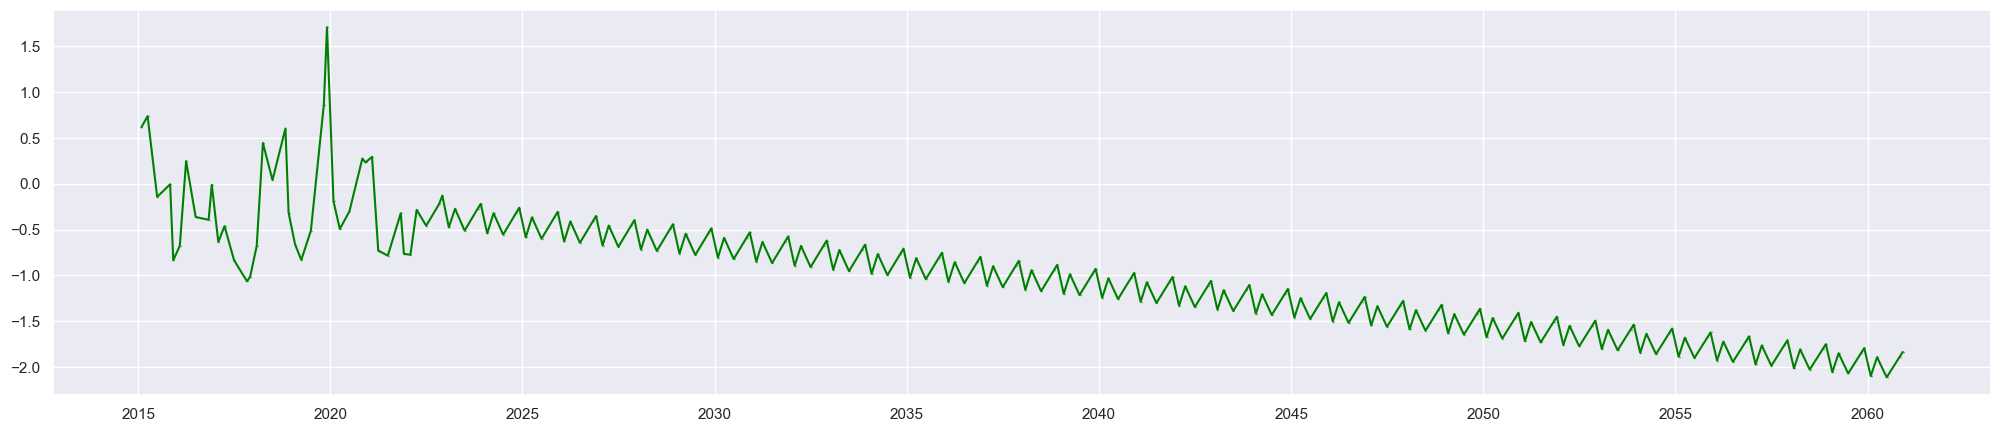

In [22]:
x = []
y = []
for i in range(12,np.size(df['Date'])+12,12):
    x.append(i-11)
    x.append(i-9)
    x.append(i-6)
    x.append(i-2)
    x.append(i-1)
    y.append(np.mean(df['Average'][i-12:i-10])) 
    y.append(np.mean(df['Average'][i-10:i-8])) 
    y.append(np.mean(df['Average'][i-8:i-3])) 
    y.append(np.mean(df['Average'][i-3:i-1]))  
    y.append(np.mean(df['Average'][i-1]))
    
plt.subplots(figsize=(25, 5))
plt.plot(df['Date'][x[35:]],y[35:],color='green', marker=1, markersize=1)

[173.75 185.29 160.76 199.35 186.42]


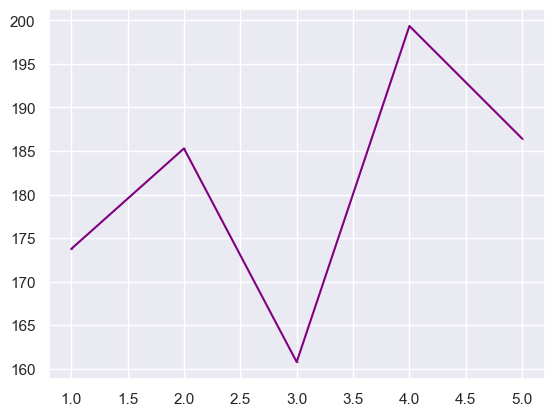

In [32]:
# Apply a refactorization
Ref_time = 40 # time at which we impose to know the actual value (remind, 5 state per year, so 40~=2023)
Ref_level = 155 # level which we impose to know (remind, in km3)
Resc = 1 # not reall important here since we will use only the firsts observations, in the next sessions it will be

from numpy.random import default_rng
rng = default_rng()
Po = np.array(y[35:])+Resc*abs(min(y))
Po = Po*Ref_level/Po[Ref_time] 

season = []
for i in range(5):
    season.append( np.mean( [Po[j*5 + i] for j in range(7) ] ) ) 
print(np.round(season,2))
# This Graph is used to estimate the CapacityFactor in the different seasons
plt.plot(range(1,6),season,color='purple', marker=1, markersize=1)

RCP 2.6 decrease: 
Level at 2060:  280.18307992500775  km3 927.0619110272477  mm
Minimum level:  270.7530117892543  km3
Variation:  3.70150469557461 %
 
RCP 8.5 decrease: 
Level at 2060:  237.84635942090802  km3 786.9793584774568  mm
Minimum level:  229.27612865204208  km3
Variation:  20.11405019461488 %
 
RCP 4.5 decrease: 
Level at 2060:  269.70628909129584  km3 892.3965995661368  mm
Minimum level:  258.5944970567354  km3
Variation:  8.408039860782988 %
 


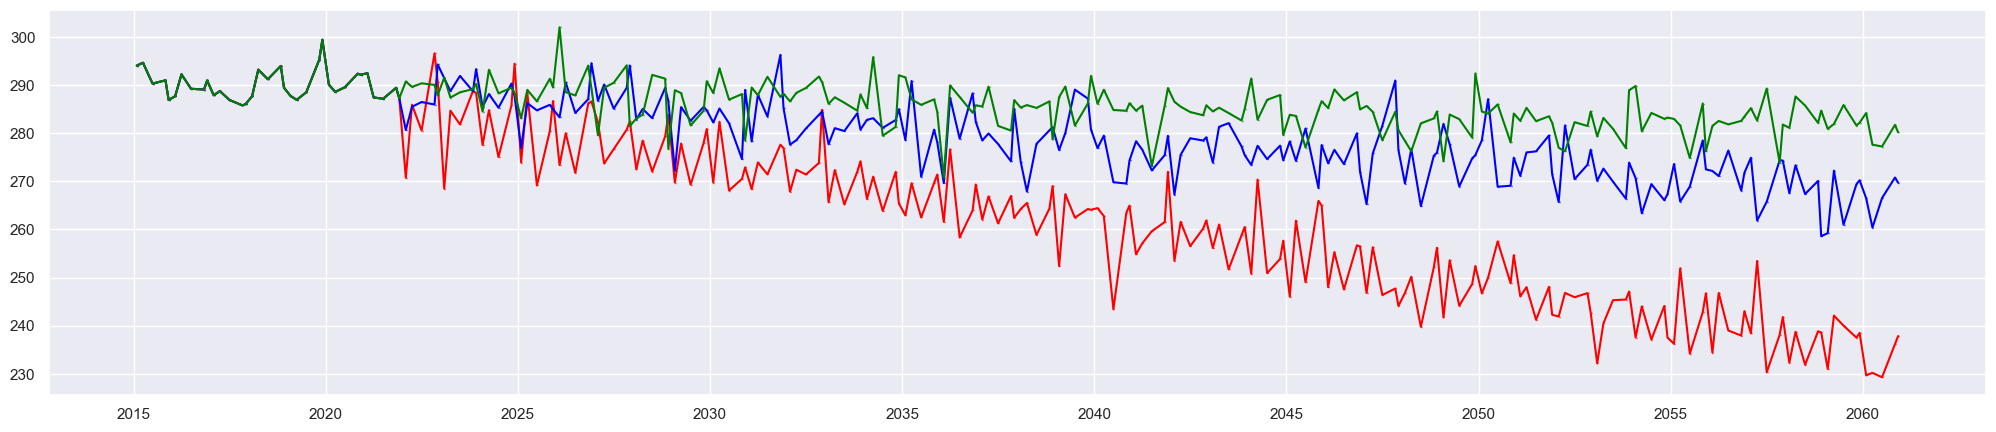

In [34]:
# Apply a refactorization
Ref_time = 2 # time at which we impose to know the actual value (remind, 5 state per year, so 40~=2023)
Ref_level = 960.6 # level which we impose to know (remind, in mm)
mmTOkm3 = 0.302226935;
Ref_level = Ref_level*mmTOkm3 # level which we impose to know (remind, in km3)
Rescaling_weak = 4.5 # the hardest part: if 1 then in 2060 level=0, grater it is higher the level of water in 2060 (Rescaling>=1, please)
Rescaling_medium = 11.35 # the hardest part: if 1 then in 2060 level=0, grater it is higher the level of water in 2060 (Rescaling>=1, please)
Rescaling_2 = 28 # the hardest part: if 1 then in 2060 level=0, grater it is higher the level of water in 2060 (Rescaling>=1, please)

from numpy.random import default_rng
rng = default_rng()
Po_2 = np.array(y[35:])+Rescaling_2*abs(min(y))
Po_2 = Po_2*Ref_level/Po_2[Ref_time] 
p = 0.3
for i in range(35,len(Po_2)):
    if p < np.random.rand():
        Po_2[i] = Po_2[i] + 5*np.random.randn()
        if Po_2[i] < 0:
            Po_2[i] = 0

# See value in 2060
print('RCP 2.6 decrease: ')
print('Level at 2060: ', Po_2[-1],' km3', Po_2[-1]/mmTOkm3,' mm')
print('Minimum level: ', min(Po_2),' km3')
var = (np.mean(Po_2[0:5])-np.mean(Po_2[len(Po_2)-6:len(Po_2)-1]))/np.mean(Po_2[0:5])*100
print('Variation: ', var, '%')
print(' ')

Po_weak = np.array(y[35:])+Rescaling_weak*abs(min(y))
Po_weak = Po_weak*Ref_level/Po_weak[Ref_time] 
Po_weak[0:35] = Po_2[0:35]
p = 0.3
for i in range(35,len(Po_weak)):
    if p < np.random.rand():
        Po_weak[i] = Po_weak[i] + 5*np.random.randn()
        
# See value in 2060
print('RCP 8.5 decrease: ')
print('Level at 2060: ', Po_weak[-1],' km3', Po_weak[-1]/mmTOkm3,' mm')
print('Minimum level: ', min(Po_weak),' km3')
var = (np.mean(Po_weak[0:5])-np.mean(Po_weak[len(Po_weak)-6:len(Po_weak)-1]))/np.mean(Po_weak[0:5])*100
print('Variation: ', var, '%')
print(' ')

Po_medium = np.array(y[35:])+Rescaling_medium*abs(min(y))
Po_medium = Po_medium*Ref_level/Po_medium[Ref_time] 
Po_medium[0:35] = Po_2[0:35]
p = 0.3
for i in range(35,len(Po_medium)):
    if p < np.random.rand():
        Po_medium[i] = Po_medium[i] + 5*np.random.randn()
        
# See value in 2060
print('RCP 4.5 decrease: ')
print('Level at 2060: ', Po_medium[-1],' km3', Po_medium[-1]/mmTOkm3,' mm')
print('Minimum level: ', min(Po_medium),' km3')
var = (np.mean(Po_medium[0:5])-np.mean(Po_medium[len(Po_medium)-6:len(Po_medium)-1]))/np.mean(Po_medium[0:5])*100
print('Variation: ', var, '%')
print(' ')

plt.subplots(figsize=(25, 5))
plt.plot(df['Date'][x[35:]],Po_weak,color='red', marker=1, markersize=1)
plt.plot(df['Date'][x[35:]],Po_medium,color='blue', marker=1, markersize=1)
plt.plot(df['Date'][x[35:]],Po_2,color='green', marker=1, markersize=1)

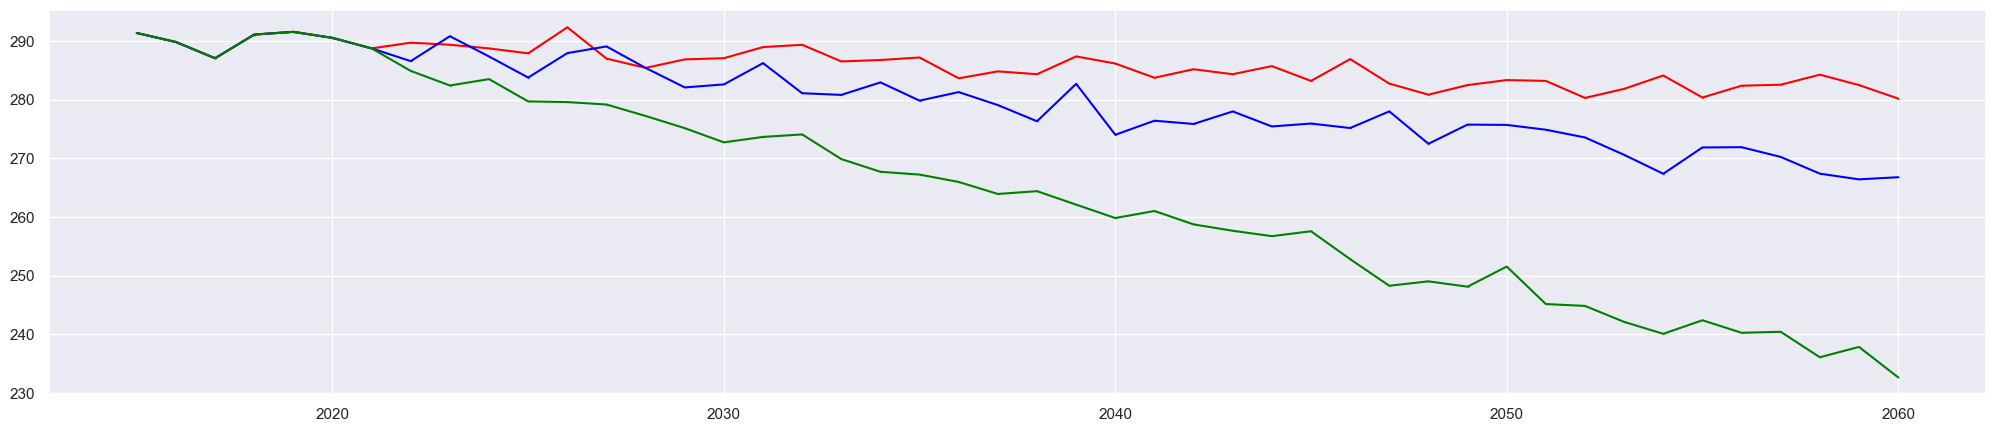

In [36]:
Precipitation_26 = []
Precipitation_45 = []
Precipitation_85 = []

for i in range(5,len(Po_weak)+5,5):
    Precipitation_26.append( np.mean(Po_2[i-5:i]) )
    Precipitation_45.append( np.mean(Po_medium[i-5:i]) )
    Precipitation_85.append( np.mean(Po_weak[i-5:i]) )
    
plt.subplots(figsize=(25, 5))
plt.plot(range(2015,2061),Precipitation_26,color='red', marker=1, markersize=1)
plt.plot(range(2015,2061),Precipitation_45,color='blue', marker=1, markersize=1)
plt.plot(range(2015,2061),Precipitation_85,color='green', marker=1, markersize=1)

In [11]:
#pip install XlsxWriter

import xlsxwriter

# Create a workbook and add a worksheet.
# Please be carefull to change the name to not overwrite
workbook = xlsxwriter.Workbook('PrecipitationProjection.xlsx') # Please be carefull to change the name to not overwrite
# Please be carefull to change the name to not overwrite
worksheet = workbook.add_worksheet()

# Start from the first cell. Rows and columns are zero indexed.
row = 1
col = 0

# Iterate over the data and write it out row by row.
worksheet.write(0, col, 'RCP 2.6')
for level in (Precipitation_26):
    worksheet.write(row, col,     level)
    row += 1
col += 1
row = 1

worksheet.write(0, col, 'RCP 4.5')
for level in (Precipitation_45):
    worksheet.write(row, col,     level)
    row += 1
col += 1
row = 1

worksheet.write(0, col, 'RCP 8.5')
for level in (Precipitation_85):
    worksheet.write(row, col,     level)
    row += 1
col += 1
row = 1

workbook.close()

ModuleNotFoundError: No module named 'xlsxwriter'